# Clustering & PCA Assignment

#### Importing the basic libraries

In [1]:
import os
import sys
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

%matplotlib inline

#### Reading the data from csv file

In [2]:
country = pd.read_csv('Country-data.csv')

#### Checking the number of rows and columns present in the dataset

In [3]:
country.shape

(167, 10)

#### Checking few rows to get an idea about dataset

In [4]:
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


#### Describing the dataset to understand the distribution within data

In [5]:
country.describe([0.25,0.50,0.75,0.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
99%,153.400000,160.480000,13.474000,146.080000,84374.000000,41.478000,82.370000,6.563600,79088.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [6]:
country.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

#### Checking the amount of nulls presnet in the dataset

In [7]:
round(100*(country.isnull().sum()/len(country.index)),2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

#### As we can see there are no null values now we can check for the outliers present in the dataset

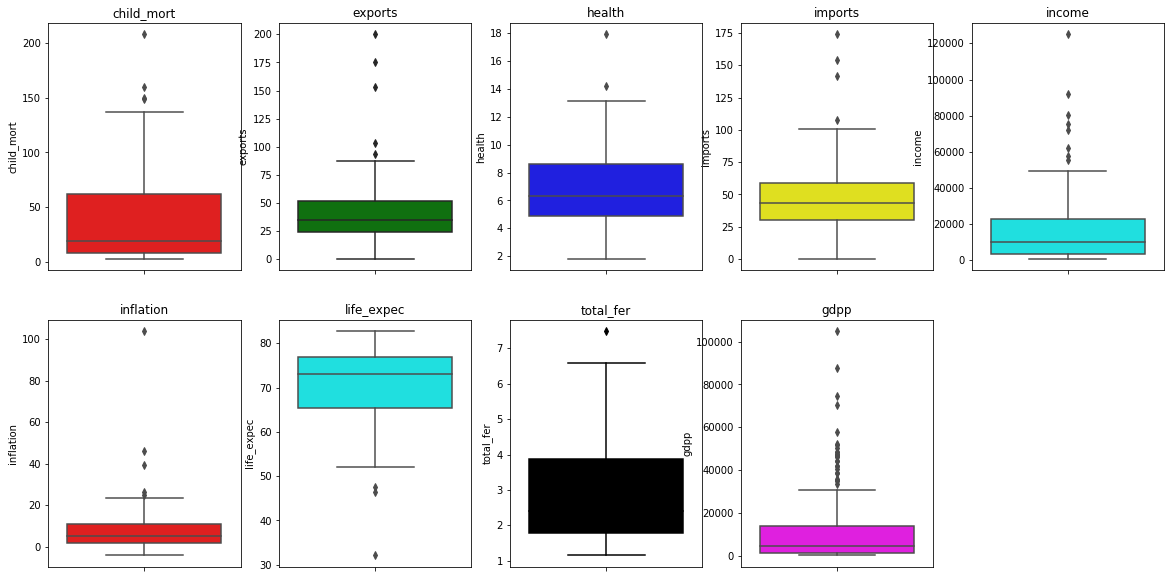

In [8]:
plt.figure(figsize=(20,10))
plt.subplot(2,5,1)
sns.boxplot(y =country.child_mort,color = 'Red')
plt.title('child_mort')

plt.subplot(2,5,2)
sns.boxplot(y =country.exports,color = 'Green')
plt.title('exports')

plt.subplot(2,5,3)
sns.boxplot(y =country.health,color = 'Blue')
plt.title('health')

plt.subplot(2,5,4)
sns.boxplot(y =country.imports,color = 'Yellow')
plt.title('imports')

plt.subplot(2,5,5)
sns.boxplot(y =country.income,color = 'Cyan')
plt.title('income')


plt.subplot(2,5,6)
sns.boxplot(y =country.inflation,color = 'red')
plt.title('inflation')

plt.subplot(2,5,7)
sns.boxplot(y =country.life_expec,color = 'Cyan')
plt.title('life_expec')

plt.subplot(2,5,8)
sns.boxplot(y =country.total_fer,color = 'black')
plt.title('total_fer')

plt.subplot(2,5,9)
sns.boxplot(y =country.gdpp,color = 'magenta')
plt.title('gdpp')

plt.show()

#### As you can see there are outliers present in the data lets try to drop the outliers

In [9]:
country.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [10]:
child_mort_q1 = country.child_mort.quantile(0.25)
child_mort_q3 = country.child_mort.quantile(0.75)
IQ_Range = child_mort_q3-child_mort_q1
country = country[(country.child_mort >= child_mort_q1-(1.5*IQ_Range)) & 
                  country.child_mort <= child_mort_q3 + (1.5*IQ_Range)]

exports_q1 = country.exports.quantile(0.25)
exports_q3 = country.exports.quantile(0.75)
IQ_Range = exports_q3-exports_q1
country = country[(country.exports >= exports_q1-(1.5 * IQ_Range)) & country.exports<=exports_q3 +(1.5 * IQ_Range)]

health_q1 = country.health.quantile(0.25)
health_q3 = country.health.quantile(0.75)
IQ_Range = health_q3-health_q1
country = country[(country.health >= health_q1 -(1.5* IQ_Range)) & (country.health <= health_q3 +(1.5* IQ_Range))]

imports_q1 = country.imports.quantile(0.25)
imports_q3 = country.imports.quantile(0.75)
IQ_Range = imports_q3-imports_q1
country = country[(country.imports >= imports_q1 -(1.5* IQ_Range)) & (country.imports <= imports_q3 +(1.5* IQ_Range))]

income_q1 = country.income.quantile(0.25)
income_q3 = country.income.quantile(0.75)
IQ_Range = income_q3-income_q1
country = country[(country.income >= income_q1 -(1.5* IQ_Range)) & (country.income <= income_q3 +(1.5* IQ_Range))]


inflation_q1 = country.inflation.quantile(0.25)
inflation_q3 = country.inflation.quantile(0.75)
IQ_Range = inflation_q3-inflation_q1
country = country[(country.inflation >= inflation_q1 -(1.5* IQ_Range)) & 
                  (country.inflation <= inflation_q3 +(1.5* IQ_Range))]


life_expec_q1 = country.life_expec.quantile(0.25)
life_expec_q3 = country.life_expec.quantile(0.75)
IQ_Range = life_expec_q3-life_expec_q1
country = country[(country.life_expec >= life_expec_q1 -(1.5* IQ_Range)) 
                  & (country.life_expec <= life_expec_q3 +(1.5* IQ_Range))]


total_fer_q1 = country.total_fer.quantile(0.25)
total_fer_q3 = country.total_fer.quantile(0.75)
IQ_Range = total_fer_q3-total_fer_q1
country = country[(country.total_fer >= total_fer_q1 -(1.5* IQ_Range)) &
                  (country.total_fer <= total_fer_q3 +(1.5* IQ_Range))]


gdpp_q1 = country.gdpp.quantile(0.25)
gdpp_q3 = country.gdpp.quantile(0.75)
IQ_Range = gdpp_q3-gdpp_q1
country = country[(country.gdpp >= gdpp_q1 -(1.5* IQ_Range)) & (country.gdpp <= gdpp_q3 +(1.5* IQ_Range))]

In [11]:
# After removal of outliers the amount of records we have
country.shape

(129, 10)

#### Cheking the effect of otlier removal

In [12]:
country.describe([0.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000
mean,42.917054,36.958132,6.323953,45.059426,10356.844961,7.470504,68.957364,3.142093,5678.620155
std,38.219322,18.923701,2.280822,17.666223,9327.085389,6.144312,7.660652,1.551166,6109.743990
min,3.200000,0.109000,1.970000,0.065900,609.000000,-1.430000,47.500000,1.230000,231.000000
50%,26.500000,32.900000,5.980000,43.500000,7880.000000,6.100000,70.400000,2.610000,3530.000000
99%,149.720000,84.176000,11.772000,81.560000,44124.000000,22.688000,80.316000,6.578800,25920.000000
max,160.000000,86.900000,13.100000,92.600000,45400.000000,23.600000,80.400000,7.490000,28000.000000


#### Lets check distributions of data

In [13]:
country_df = country

#### Dropping the column 'country' and applying PCA on the rest of the feature

In [14]:
country_df = country_df.drop('country',axis='columns')

In [15]:
col = list(country_df.columns)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
country_df = scaler.fit_transform(country_df)
country_df = pd.DataFrame(country_df,columns=col)
country_df.head()

C:\Users\sumasark\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\sumasark\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.241971,-1.430124,0.552846,-0.009059,-0.941446,0.321789,-1.671803,1.733114,-0.842196
1,-0.691264,-0.475227,0.099494,0.201196,-0.045942,-0.486975,0.962224,-0.965667,-0.261028
2,-0.410210,0.076491,-0.948058,-0.776209,0.273726,1.409945,0.988433,-0.163152,-0.200233
3,1.998454,1.344381,-1.529053,-0.122711,-0.479702,2.439281,-1.160723,1.953159,-0.353042
4,-0.856745,0.453144,-0.129383,0.786503,0.941049,-0.985304,1.027747,-0.655016,1.071535


In [16]:
# Table showing mean as 0 and Standard Deviation as 1 after standard scaling
round(country_df.describe())

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,129.0,129.0,129.0,129.0,129.0,129.0,129.0,129.0,129.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-1.0,-2.0,-2.0,-3.0,-1.0,-1.0,-3.0,-1.0,-1.0
25%,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
50%,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0
75%,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
max,3.0,3.0,3.0,3.0,4.0,3.0,1.0,3.0,4.0


#### Lets visualize the data distribution as PCA always demands the data to be normalized and centered

C:\Users\sumasark\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\sumasark\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\sumasark\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\sumasark\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\sumasark\Anaconda3\lib\site-packages\matplotlib

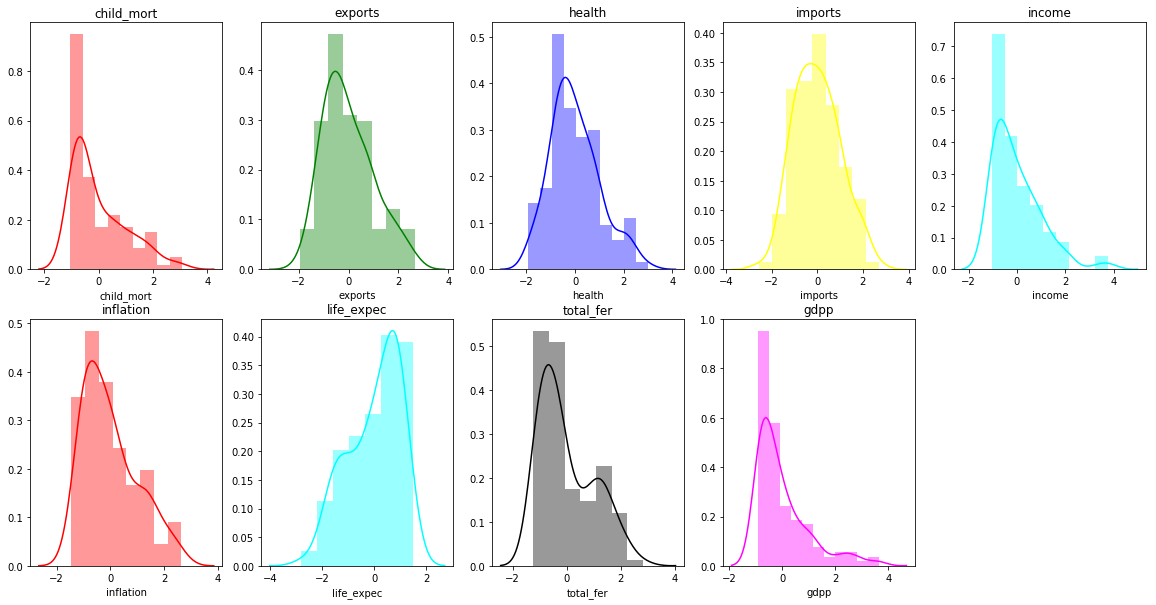

In [17]:
plt.figure(figsize=(20,10))
plt.subplot(2,5,1)
sns.distplot(country_df.child_mort,color = 'Red')
plt.title('child_mort')

plt.subplot(2,5,2)
sns.distplot(country_df.exports,color = 'Green')
plt.title('exports')

plt.subplot(2,5,3)
sns.distplot(country_df.health,color = 'Blue')
plt.title('health')

plt.subplot(2,5,4)
sns.distplot(country_df.imports,color = 'Yellow')
plt.title('imports')

plt.subplot(2,5,5)
sns.distplot(country_df.income,color = 'Cyan')
plt.title('income')


plt.subplot(2,5,6)
sns.distplot(country_df.inflation,color = 'red')
plt.title('inflation')

plt.subplot(2,5,7)
sns.distplot(country_df.life_expec,color = 'Cyan')
plt.title('life_expec')

plt.subplot(2,5,8)
sns.distplot(country_df.total_fer,color = 'black')
plt.title('total_fer')

plt.subplot(2,5,9)
sns.distplot(country_df.gdpp,color = 'magenta')
plt.title('gdpp')

plt.show()

#### Though the graphs are little bit skewed but the mean is is zero

#### Import PCA library and applying PCA to the dataset

In [18]:
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized',random_state=42)
pca.fit(country_df)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

#### Taking a look into the PCA components

In [19]:
pca.components_.shape

(9, 9)

In [20]:
pca.components_

array([[-4.35697913e-01,  2.59821263e-01,  9.43826811e-02,
         1.39412289e-01,  4.08383524e-01, -1.63921515e-01,
         4.24082936e-01, -4.23757787e-01,  4.01561948e-01],
       [ 7.36969385e-02,  2.67429664e-01,  3.61281888e-01,
         7.03935366e-01, -2.26930344e-01, -4.47796169e-01,
        -1.36346160e-01,  9.04448239e-02, -1.34948889e-01],
       [ 6.01978442e-02,  6.42228798e-01, -5.88862789e-01,
         2.71861565e-01,  1.05704536e-01,  3.58871296e-01,
        -9.20862268e-02,  1.08100192e-01, -5.58812544e-02],
       [ 3.04200898e-01,  1.69536764e-01,  4.81461161e-01,
        -5.59181625e-02,  4.07319091e-01,  2.57804771e-01,
        -2.83563072e-01,  3.33384180e-01,  4.68894700e-01],
       [-2.42041197e-01, -5.87666048e-04,  4.45876356e-01,
         1.94301646e-01, -1.83672950e-01,  7.26044877e-01,
         1.52333942e-01, -1.77056851e-01, -2.99040439e-01],
       [ 1.29320819e-02,  5.45151317e-01,  2.31209465e-01,
        -5.21761792e-01, -1.57051096e-01, -1.484323

#### Lets plot the principal components according the country

In [21]:
columns = list(country_df.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1],'Feature':columns})
round(pcs_df)

,PC1,PC2,Feature
0,-0.0,0.0,child_mort
1,0.0,0.0,exports
2,0.0,0.0,health
3,0.0,1.0,imports
4,0.0,-0.0,income
5,-0.0,-0.0,inflation
6,0.0,-0.0,life_expec
7,-0.0,0.0,total_fer
8,0.0,-0.0,gdpp


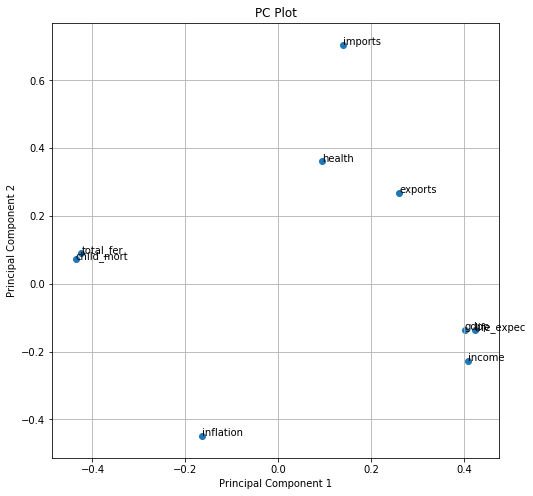

In [22]:
plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1,pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PC Plot')
plt.grid()
for i,txt in enumerate(pcs_df.Feature):
    plt.annotate(txt,(pcs_df.PC1[i],pcs_df.PC2[i]))
plt.show()

#### Lets plot a SCREE plot to find the number of Principal Component required for the model

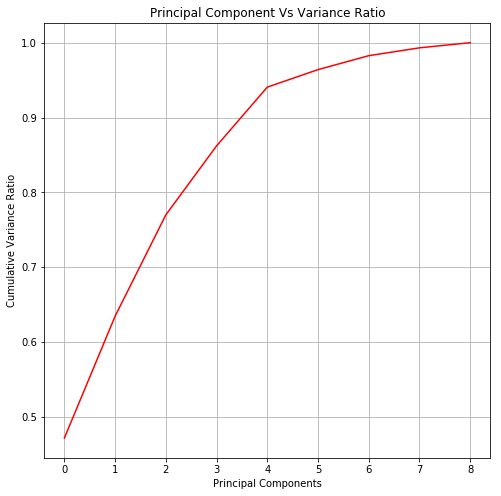

In [23]:
plt.figure(figsize=(8,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_),color='red')
plt.xlabel('Principal Components')
plt.ylabel('Cumulative Variance Ratio')
plt.title('Principal Component Vs Variance Ratio')
plt.grid()
plt.show()

#### It looks like 4 PC is enough to explain around 95% of the varience in the dataset

#### Let rerun the PCA using 4 feature

In [24]:
from sklearn.decomposition import IncrementalPCA
pca_new = IncrementalPCA(n_components=4)

In [25]:
pca_new_df = pca_new.fit_transform(country_df)

In [26]:
pca_new_df.shape

(129, 4)

#### Checking the correlation matrix

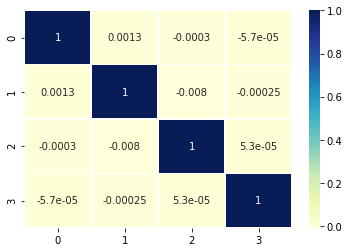

In [27]:
corrmat = np.corrcoef(pca_new_df.T)
sns.heatmap(corrmat,annot=True,linewidths=.5,cmap='YlGnBu')
plt.show()

#### Now we can see that there is no correlation between two PC,s

#### Let,s take a look at our final four basis vectors

In [28]:
pd.DataFrame(pca_new_df.T)

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,128
0,3.078983,-0.991048,-0.290452,2.741561,-2.274591,-0.829422,-0.292662,-0.502006,-3.205379,-3.825437,...,-1.368327,-0.216272,3.033008,-0.712100,-1.629628,0.726645,0.498836,-0.908622,1.852402,2.915883
1,0.430910,-0.028805,-1.742802,-0.585952,0.514825,-2.848436,-0.647704,-1.491796,-0.160897,-0.645317,...,-1.525741,0.628472,-0.039542,-0.055906,-1.060693,-1.409299,1.035405,1.596647,-1.612150,-0.293523
2,-0.790783,-0.699791,0.918318,3.050407,0.006961,-0.679666,-0.203419,0.760743,-1.246859,1.557628,...,-1.105774,1.983672,-1.070331,0.281870,-1.486330,0.238241,0.392942,1.648348,1.083350,0.679301
3,0.759548,-1.111082,-0.462486,1.362807,-0.175889,0.974358,-1.559636,0.369351,1.546373,1.727494,...,-0.042915,-0.686101,1.207189,-0.351086,0.299153,-0.524810,-0.723369,-0.628990,0.335089,1.028907


In [29]:
cols = ['PC1','PC2','PC3','PC4']
pca_new_df = pd.DataFrame(pca_new_df,columns=cols)
pca_new_df.head()

,PC1,PC2,PC3,PC4
0,3.078983,0.430910,-0.790783,0.759548
1,-0.991048,-0.028805,-0.699791,-1.111082
2,-0.290452,-1.742802,0.918318,-0.462486
3,2.741561,-0.585952,3.050407,1.362807
4,-2.274591,0.514825,0.006961,-0.175889


#### Hopkins Statistics

In [30]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [31]:
hopkins(pca_new_df)

0.6822172933070261

#### Lets do a silhouette analysis & Inertia analysis which are basically same finding the amount of spread in data

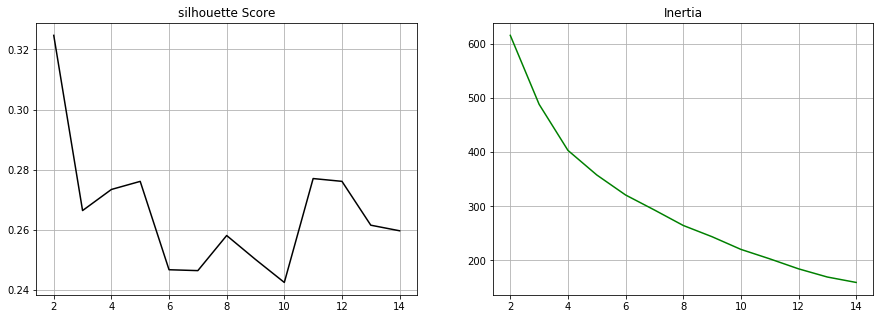

In [32]:
from sklearn.metrics import silhouette_score
sil_s = []
for i in range(2,15):
    kmeans = KMeans(n_clusters=i).fit(pca_new_df)
    sil_s.append([i,silhouette_score(pca_new_df,kmeans.labels_)])
    
    
inert = []
for i in range(2,15):
    kmeans = KMeans(n_clusters=i).fit(pca_new_df)
    inert.append([i,kmeans.inertia_])
    
    
    
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(pd.DataFrame(sil_s)[0],pd.DataFrame(sil_s)[1],color='black')
plt.title('silhouette Score')
plt.grid()
plt.subplot(1,2,2)
plt.plot(pd.DataFrame(inert)[0],pd.DataFrame(inert)[1],color='green')
plt.title('Inertia')
plt.grid()
plt.show()

#### For both the graph we can see an elbow at 3 so for our first KMeans we are going to select K=3

In [33]:
from sklearn.cluster import KMeans
pca_new_df_k3 = KMeans(n_clusters=3,max_iter=30,random_state=42)
pca_new_df_k3.fit(pca_new_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=30,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

#### Appending our cluster_ID,s with the PC dataset

In [34]:
pca_new_kmean = pd.concat([pca_new_df,pd.Series(pca_new_df_k3.labels_)],axis='columns')
pca_new_kmean.columns = ['PC1','PC2','PC3','PC4','Cluster_ID']
pca_new_kmean.head()

,PC1,PC2,PC3,PC4,Cluster_ID
0,3.078983,0.430910,-0.790783,0.759548,0
1,-0.991048,-0.028805,-0.699791,-1.111082,2
2,-0.290452,-1.742802,0.918318,-0.462486,2
3,2.741561,-0.585952,3.050407,1.362807,0
4,-2.274591,0.514825,0.006961,-0.175889,1


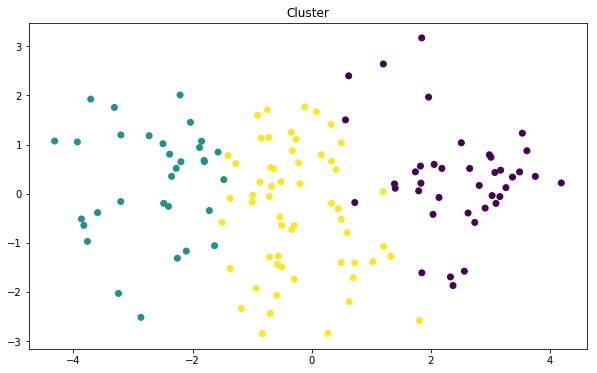

In [35]:
plt.figure(figsize=(10,6))
plt.scatter(np.array(pca_new_kmean.PC1), np.array(pca_new_kmean.PC2),c=pca_new_kmean.Cluster_ID)
plt.title('Cluster')
plt.show()

## Heirarchical Clustering

Single Linkage method here minimum distance is being used for distance between clusturs

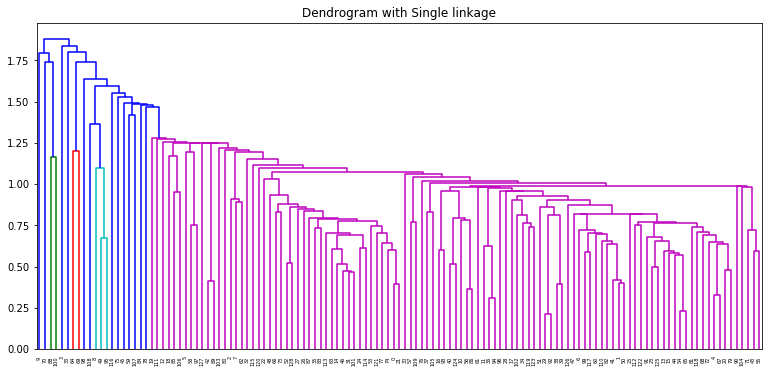

In [36]:
plt.figure(figsize=(13,6))
pca_new_hc_single = linkage(pca_new_df,method='single',metric='euclidean')
dendrogram(pca_new_hc_single)
plt.title('Dendrogram with Single linkage')
plt.show()

Complete linkage method here maximum distance is being used between the clusters

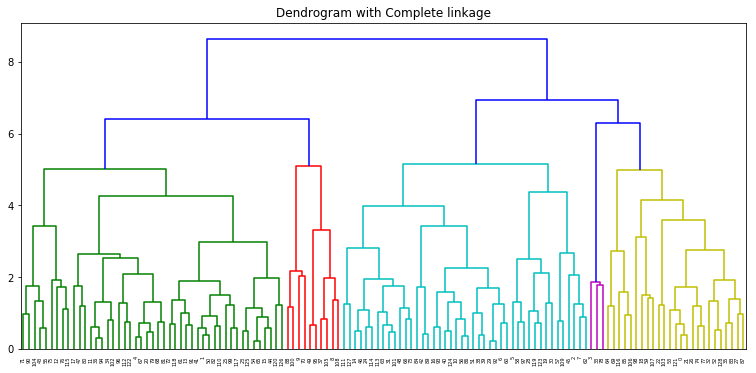

In [37]:
plt.figure(figsize=(13,6))
pca_new_hc_complete = linkage(pca_new_df,method='complete',metric='euclidean')
dendrogram(pca_new_hc_complete)
plt.grid(axis='horizontal')
plt.title('Dendrogram with Complete linkage')
plt.show()

In [38]:
cluster_cut = pd.Series(cut_tree(pca_new_hc_complete,n_clusters=3).reshape(-1))
pca_new_hc = pd.concat([pca_new_df,cluster_cut],axis='columns')
pca_new_hc.columns = ['PC1','PC2','PC3','PC4','ClusterID']

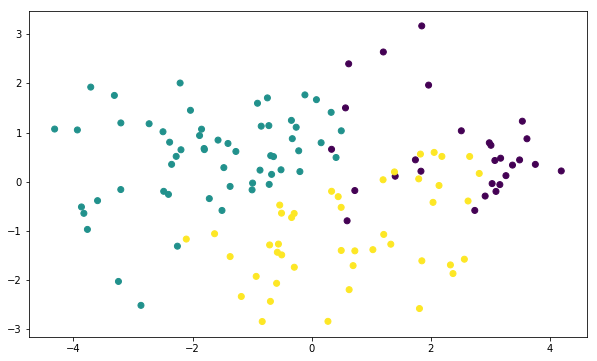

In [39]:
plt.figure(figsize=(10,6))
plt.scatter(pca_new_hc.PC1,pca_new_hc.PC2,c = pca_new_hc.ClusterID)
plt.show()

#### The classification done by KMeans is looking better as it distinguished the clusters in a better manner, So i am using this cluster for the analysis

#### Merging this labels which is generated by KMeans with the actual DataSet for further analysis

In [40]:
country_new = pd.DataFrame(country).reset_index()
p_labels = pd.DataFrame(pca_new_df_k3.labels_)
p_labels.columns = ['ClusterID']
p_labels.head()

,ClusterID
0,0
1,2
2,2
3,0
4,1


In [41]:
country_final = pd.concat([country_new,p_labels],axis='columns')
country_final.sample(5)

,index,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
82,105,Morocco,33.5,32.2,5.20,43.0,6440,0.976,73.5,2.58,2830,2
68,86,Lebanon,10.3,35.8,7.03,60.2,16300,0.238,79.8,1.61,8860,1
18,21,Botswana,52.5,43.6,8.30,51.3,13300,8.920,57.1,2.88,6350,2
26,31,Central African Republic,149.0,11.8,3.98,26.5,888,2.010,47.5,5.21,446,0
24,28,Cameroon,108.0,22.2,5.13,27.0,2660,1.910,57.3,5.11,1310,0


#### Plotting scatter for clusterwise GDP and child mort

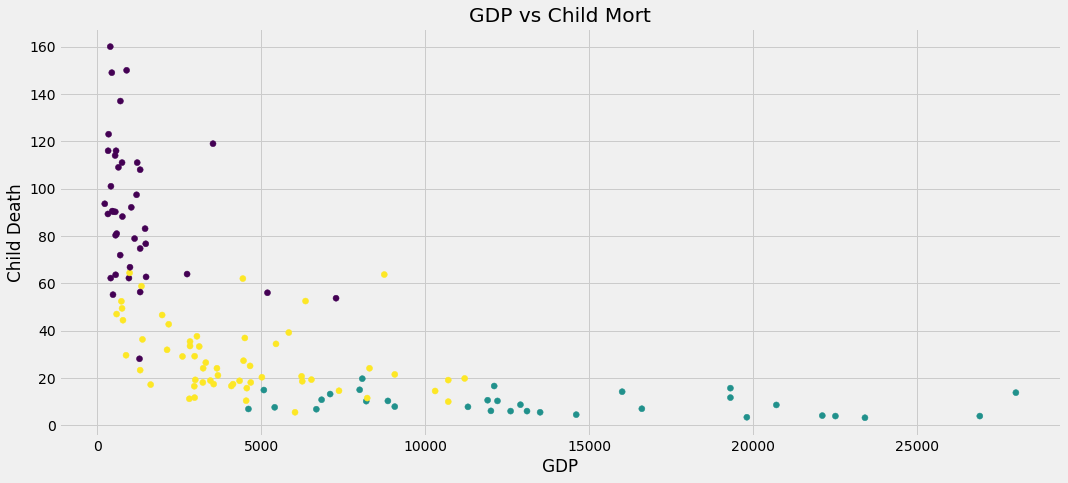

In [42]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(16,7))
plt.scatter(x = country_final.gdpp,y = country_final.child_mort,c =country_final.ClusterID )
plt.xlabel('GDP')
plt.ylabel('Child Death')
plt.title('GDP vs Child Mort')
plt.show()

#### The below graph is showing we should focus more on the countries present in the cluster 1 as we can see that the death of children is high where as the GDP is very low , Also Life Expectency is lowest among the three

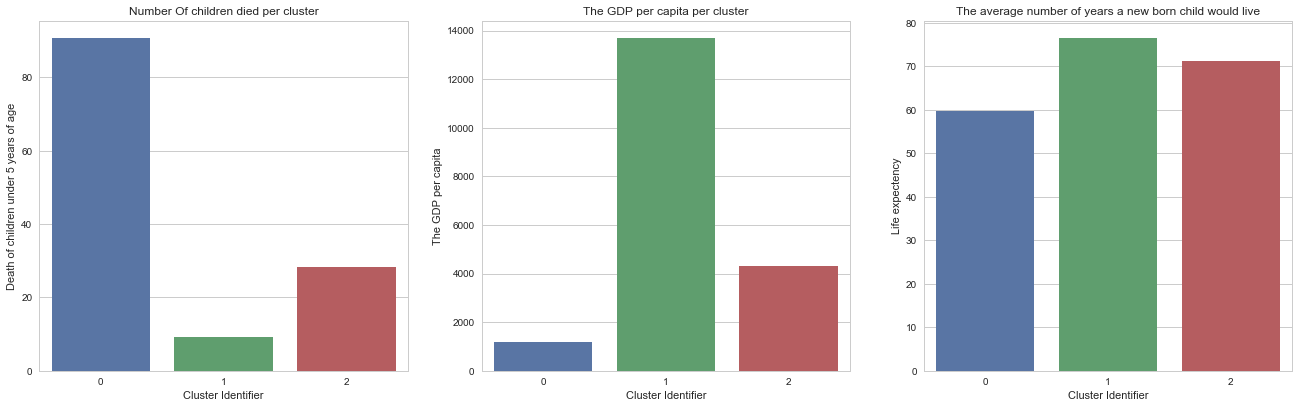

In [43]:
sns.set(style="whitegrid")
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
sns.barplot(country_final.groupby('ClusterID')['child_mort'].mean().reset_index().ClusterID,
            country_final.groupby('ClusterID')['child_mort'].mean().reset_index().child_mort)
plt.xlabel('Cluster Identifier')
plt.ylabel('Death of children under 5 years of age')
plt.title('Number Of children died per cluster')
plt.subplot(1,3,2)
sns.barplot(country_final.groupby('ClusterID')['gdpp'].mean().reset_index().ClusterID,
            country_final.groupby('ClusterID')['gdpp'].mean().reset_index().gdpp)
plt.xlabel('Cluster Identifier')
plt.ylabel('The GDP per capita')
plt.title('The GDP per capita per cluster')
plt.subplot(1,3,3)
sns.barplot(country_final.groupby('ClusterID')['life_expec'].mean().reset_index().ClusterID,
            country_final.groupby('ClusterID')['life_expec'].mean().reset_index().life_expec)
plt.xlabel('Cluster Identifier')
plt.ylabel('Life expectency')
plt.title('The average number of years a new born child would live')
plt.show()

#### Lets build some more graph to be conform about the descision

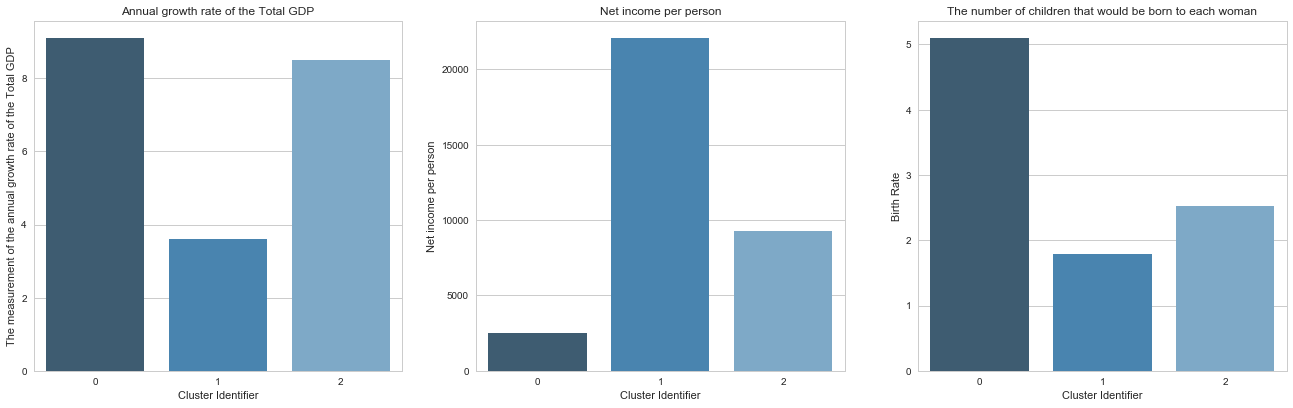

In [44]:
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
sns.barplot(country_final.groupby('ClusterID')['inflation'].mean().reset_index().ClusterID,
            country_final.groupby('ClusterID')['inflation'].mean().reset_index().inflation,palette="Blues_d")
plt.xlabel('Cluster Identifier')
plt.ylabel('The measurement of the annual growth rate of the Total GDP')
plt.title('Annual growth rate of the Total GDP')
plt.subplot(1,3,2)
sns.barplot(country_final.groupby('ClusterID')['income'].mean().reset_index().ClusterID,
            country_final.groupby('ClusterID')['income'].mean().reset_index().income,palette="Blues_d")
plt.xlabel('Cluster Identifier')
plt.ylabel('Net income per person')
plt.title('Net income per person')
plt.subplot(1,3,3)
sns.barplot(country_final.groupby('ClusterID')['total_fer'].mean().reset_index().ClusterID,
            country_final.groupby('ClusterID')['total_fer'].mean().reset_index().total_fer,palette="Blues_d")
plt.xlabel('Cluster Identifier')
plt.ylabel('Birth Rate')
plt.title('The number of children that would be born to each woman')
plt.show()

### With all the graph plotted it is a clear indication that we should focus on the Cluster 0 as it seems it is a poor country and the birth rate is high

#### Lets create a dataset to keep track on the backward countries and start analyse it

In [45]:
backward_countries_child_mort=country_final[country_final.ClusterID==0].sort_values(by='child_mort',ascending=False)
backward_countries_child_mort.head()

,index,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
103,132,Sierra Leone,160.0,16.8,13.10,34.5,1220,17.20,55.0,5.20,399,0
27,32,Chad,150.0,36.8,4.53,43.5,1930,6.39,56.5,6.59,897,0
26,31,Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446,0
77,97,Mali,137.0,22.8,4.98,35.1,1870,4.37,59.5,6.55,708,0
87,112,Niger,123.0,22.2,5.16,49.1,814,2.55,58.8,7.49,348,0


#### Below graph will show top 5 countries where child death rate is very high

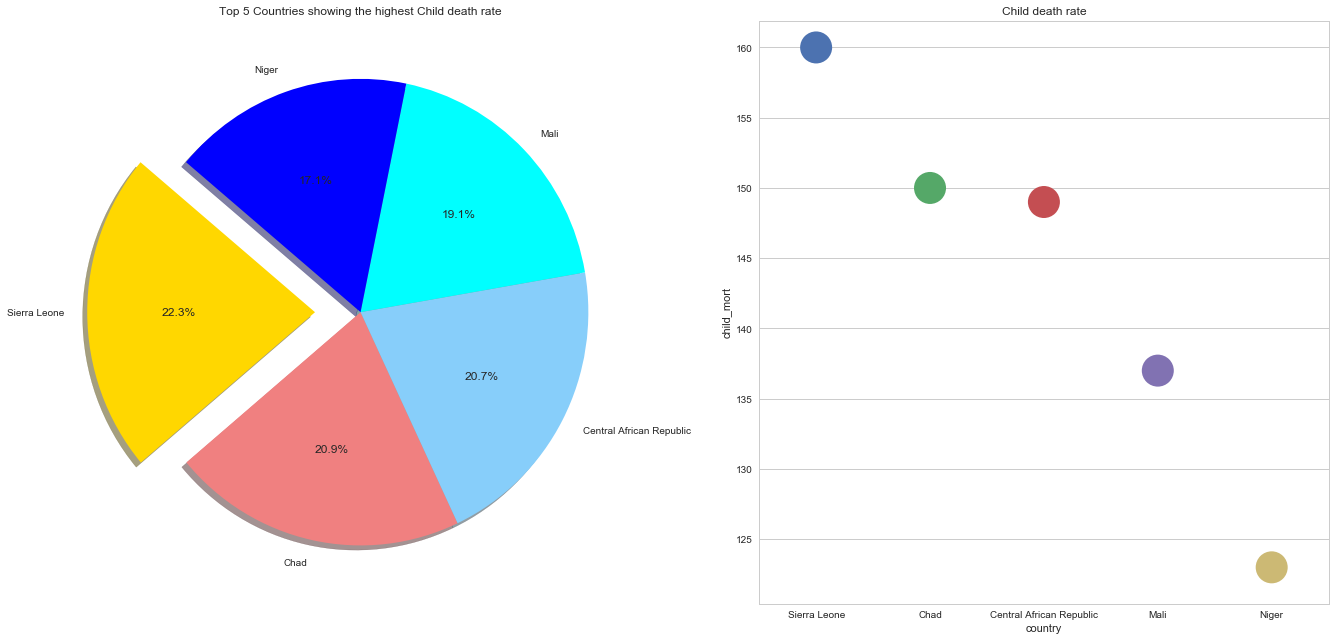

In [46]:
pie_label  = list(backward_countries_child_mort.head(5).country)
pie_colors = ['gold','lightcoral','lightskyblue','cyan','blue']
pie_explode = (0.2,0,0,0.0,0.0)
pie_size =  list(backward_countries_child_mort.head(5).child_mort)
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.pie(pie_size,explode = pie_explode,labels = pie_label,colors =pie_colors,
       autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Top 5 Countries showing the highest Child death rate')
plt.subplot(1,2,2)
sns.stripplot(backward_countries_child_mort.head(5).country, backward_countries_child_mort.head(5).child_mort,
              size=backward_countries_child_mort.child_mort/5)
plt.title('Child death rate')
plt.show()

#### Top Countries with Highest death rate(Sierra Leone,Niger,Mali,Central African Republic,Chad)

C:\Users\sumasark\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


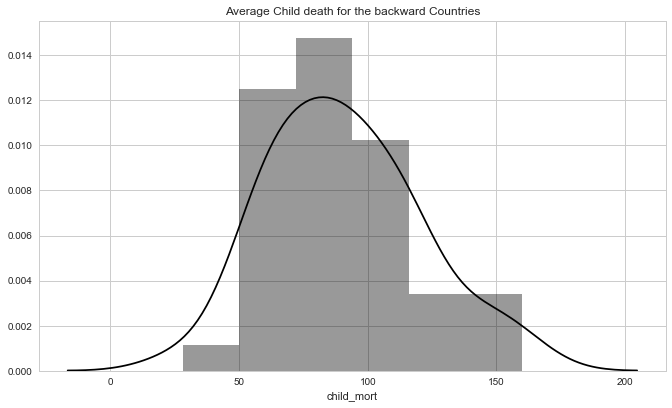

In [47]:
plt.figure(figsize=(10,6))
sns.distplot(backward_countries_child_mort.child_mort,color='black')
plt.title('Average Child death for the backward Countries')
plt.show()

#### On an average 90 children will die out of 1000 born which is nearly 10%

In [48]:
country_final_gdpp = country_final[country_final.ClusterID==0].sort_values(by='gdpp').head(12)

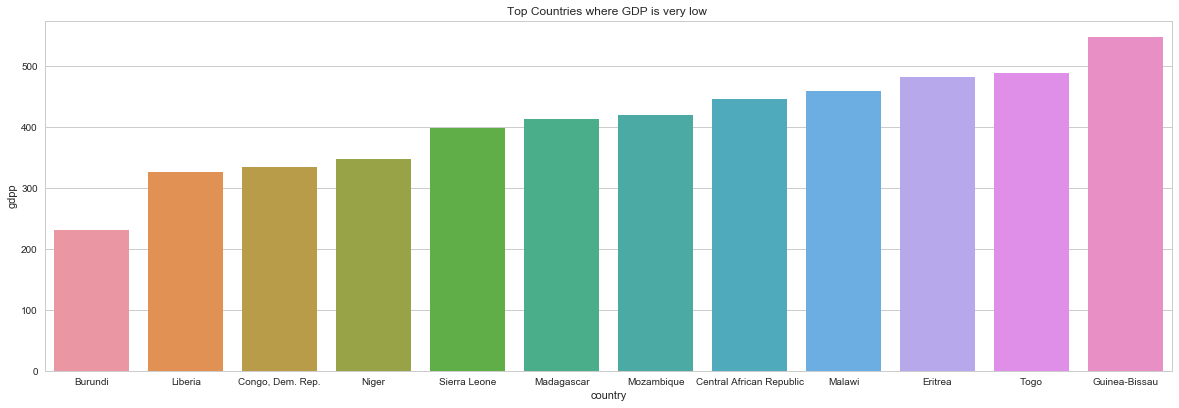

In [49]:
plt.figure(figsize=(18,6))
sns.barplot(x = country_final_gdpp.country,y=country_final_gdpp.gdpp)
plt.title('Top Countries where GDP is very low ')
plt.show()

#### Countries with lowesr GDP (Burundi,Liberia,Congo,Dem. Rep , Niger,Sierra Leone)

#### Analysing the countries on the basis of income

In [50]:
backward_countries_income = country_final[country_final.ClusterID==0].sort_values(by='income').head(12)


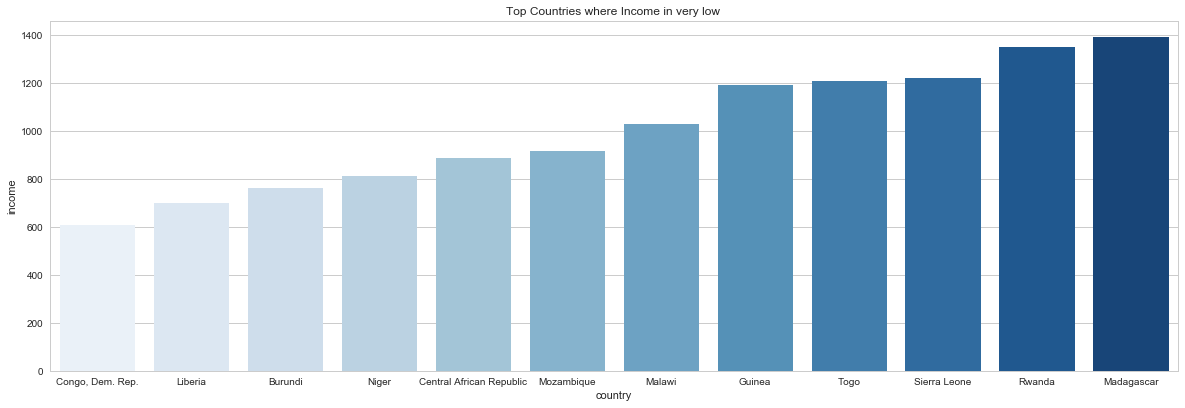

In [51]:
plt.figure(figsize=(18,6))
sns.barplot(x = backward_countries_income.country,y=backward_countries_income.income,palette='Blues')
plt.title('Top Countries where Income in very low ')
plt.show()

#### Countries with Low income (Congo,Dem.Rep,Liberia,Burundi,Niger,Central African Republic)

In [52]:
backward_countries_health = country_final[country_final.ClusterID==0].sort_values(by='health').head(5)

#### Health wise spending for the countries

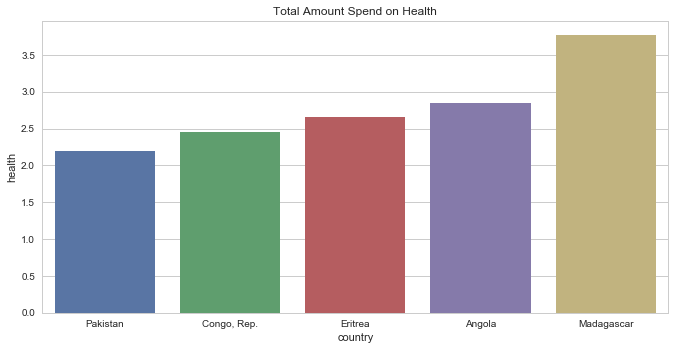

In [53]:
plt.figure(figsize=(10,5))
sns.barplot(y = backward_countries_health.health,x=backward_countries_health.country)
plt.title('Total Amount Spend on Health')
plt.show()

#### Coutry where the spend on the health is low(Pakistan,Congo,Rep.,Eritrea,Angola,Madagascar)

#### Birth Rate Vs Death Rate Graph

In [54]:
b_vs_d_rate = country_final[country_final.ClusterID==0]
b_vs_d_rate.head()

,index,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,0
3,3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,0
14,17,Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,0
21,25,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,0
22,26,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,0


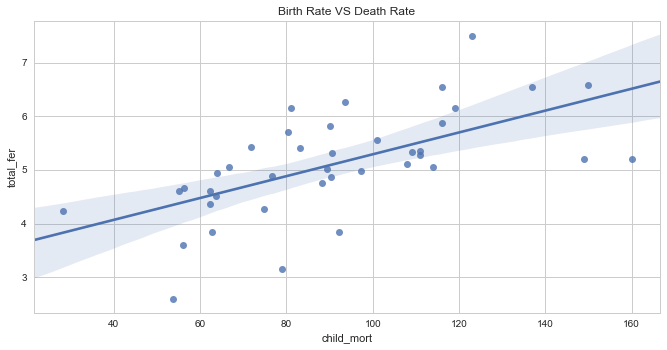

In [55]:
plt.figure(figsize=(10,5))
sns.regplot(x = b_vs_d_rate.child_mort,y = b_vs_d_rate.total_fer)
plt.title('Birth Rate VS Death Rate')
plt.show()

#### Here we can see there is a linear relationship with birth Rate and Death rate country where birth rate is high death rate is also high

# Hence Countries which are in need are
1 . Sierra Leone
2 . Niger
3 . Congo,Dem. Rep
4 . Chad
5 . Central African Republic